In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
import cv2
from keras.layers import Activation

In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

In [0]:
print(np.mean(train_features[:,:,:,0]),np.mean(train_features[:,:,:,1]),np.mean(train_features[:,:,:,2]))
print(np.std(train_features[:,:,:,0]),np.std(train_features[:,:,:,1]),np.std(train_features[:,:,:,2]))

125.306918046875 122.950394140625 113.86538318359375
62.993219278136884 62.08870764001421 66.70489964063091


In [0]:
channel_mean = [125.31, 122.95, 113.86]
channel_std = [62.9932, 62.0887, 66.7048]

In [0]:
test_features.shape

(10000, 32, 32, 3)

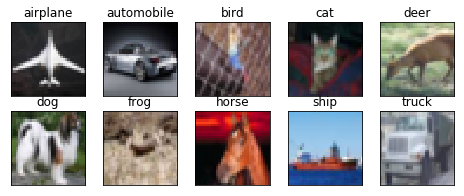

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
#train_features = train_features.astype('float32')/255
#test_features = test_features.astype('float32')/255
channel_mean = np.array(channel_mean).astype('float32')
channel_std = np.array(channel_std).astype('float32')
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)
print(channel_mean, channel_std)

[125.31 122.95 113.86] [62.9932 62.0887 66.7048]


# Cutout Implementation[ chanel_mean/channel_std]

In [0]:
def get_cutout_images(s_h=0.5, s_w=0.5):
    def cutout(input_img):
        
        img_h, img_w, img_c = input_img.shape
        
        while True:
            img_h_new = int(img_h * s_h)
            img_w_new = int(img_w * s_w)
            
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)
            
            if left + img_w_new <= img_w and top + img_h_new <= img_h:
                break    
                
        for ch_ind in range(img_c):            
            input_img[top:top + img_h_new, left:left + img_w_new, ch_ind] = channel_mean[ch_ind]/channel_std[ch_ind] ##dataset channel wise mean/std
        

        return input_img
    return cutout

In [0]:
cutout = get_cutout_images()

In [0]:
cols, rows = 5, 2
img_num = cols * rows
 
def show_cutout_images(test_data, image_idx):
    #image = test_data[img_id]
    fig = plt.figure(figsize=(30,20))
    for ind_ in image_idx:
        image = test_data[ind_]
        ax = fig.add_subplot(rows, cols, i + 1)
        img_out = cutout(image)
        plt.imshow(img_out, interpolation="nearest")
        plt.axis('off')
        #img_out = []
        
    plt.show()
    
  

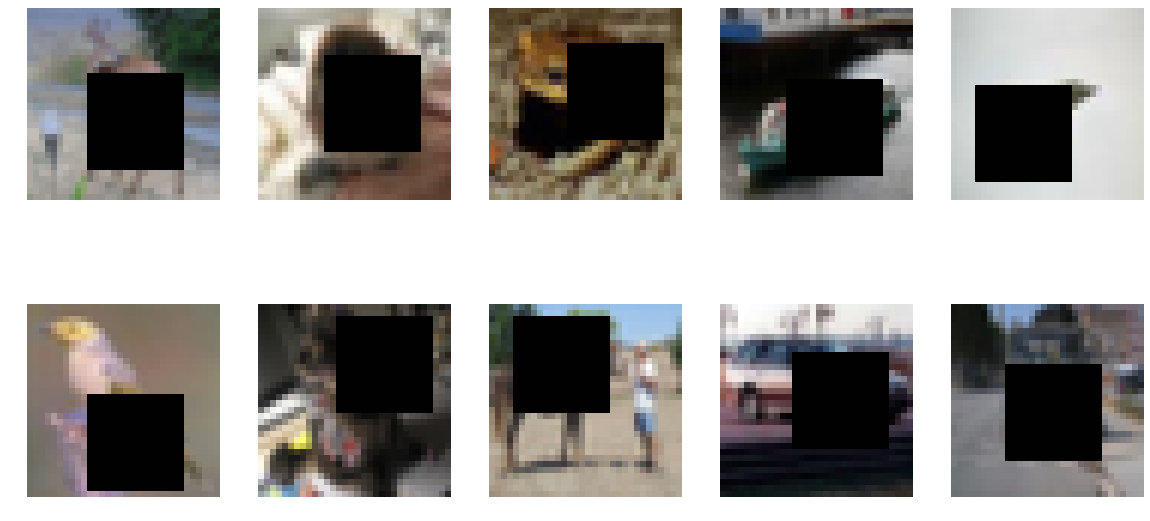

In [0]:
fig = plt.figure(figsize=(20, 10))
image_idx = [100, 200, 300, 401, 499, 603, 715, 803, 906, 1008]
test_features1 = np.copy(test_features)
all_images = []
for ind_ in image_idx:
  all_images.append(test_features1[ind_])
  
cols, rows = 5, 2
img_num = cols * rows

for i in range(img_num):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(cutout(all_images[i]), interpolation="nearest")
    plt.axis('off')

# Load dataset and preprocessing

In [0]:
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()


print('Statistics train=%.3f (%.3f), test=%.3f (%.3f)' % (trainX.mean(), trainX.std(), testX.mean(), testX.std()))

# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

# calculate the mean on the training dataset
datagen.fit(trainX)
#print('Data Generator mean=%.3f, std=%.3f' % (datagen.mean, datagen.std))

# demonstrate effect on a single batch of samples
iterator = datagen.flow(trainX, trainy, batch_size=128)

# get a batch
batchX, batchy = iterator.next()

# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())

# demonstrate effect on entire training dataset
iterator = datagen.flow(trainX, trainy, batch_size=len(trainX), shuffle=False)

# get a batch
batchX, batchy = iterator.next()

# pixel stats in the batch
print(batchX.shape, batchX.mean(), batchX.std())

Statistics train=120.708 (64.150), test=121.529 (64.061)
(128, 32, 32, 3) 0.047427226 0.99563384
(50000, 32, 32, 3) -1.6605131e-06 1.0000001


In [0]:
iterator1 = datagen.flow(testX, testy, batch_size=len(testX), shuffle=False)
batch_testX, batch_testy = iterator1.next()

X_train = batchX
X_test = batch_testX

y_train=batchy
y_test=batch_testy
                        

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

# Model Architecture

In [0]:
# Define the model
model1 = Sequential()
model1.add(Convolution2D(32, 3, 3, border_mode='same',kernel_regularizer=regularizers.l2(0.0001), input_shape=(32, 32, 3)))
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(Convolution2D(64, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same'))
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.2))

model1.add(Convolution2D(32, 1, 1))


model1.add(Convolution2D(64, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same'))
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(Convolution2D(128, 3, 3,kernel_regularizer=regularizers.l2(0.0001),border_mode='same'))
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.3))

model1.add(Convolution2D(32, 1, 1))


model1.add(Convolution2D(128, 3, 3,kernel_regularizer=regularizers.l2(0.0001), border_mode='same'))
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(Convolution2D(256, 3, 3,kernel_regularizer=regularizers.l2(0.0001), border_mode='same'))
model1.add(Activation('relu'))
model1.add(BatchNormalization())

model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.5))

model1.add(Convolution2D(10, 1, 1))

model1.add(AveragePooling2D(pool_size = (4,4)))
model1.add(Flatten())


model1.add(Activation('softmax'))



In [0]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_64 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_50 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_43 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
activation_51 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_44 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 16, 16, 64)        0         
__________

# Learning rate finder

## Method 1

In [0]:
class LR_Finder(Callback):
    
    def __init__(self, start_lr=1e-5, end_lr=10, step_size=None, beta=.98):
        super().__init__()
        
        self.start_lr = start_lr
        self.end_lr = end_lr
        self.step_size = step_size
        self.beta = beta
        self.lr_mult = (end_lr/start_lr)**(1/step_size)
        
    def on_train_begin(self, logs=None):
        self.best_loss = 1e9
        self.avg_loss = 0
        self.losses, self.smoothed_losses, self.lrs, self.iterations = [], [], [], []
        self.iteration = 0
        logs = logs or {}
        K.set_value(self.model.optimizer.lr, self.start_lr)
        
    def on_batch_end(self, epoch, logs=None):
        logs = logs or {}
        loss = logs.get('loss')
        self.iteration += 1
        
        self.avg_loss = self.beta * self.avg_loss + (1 - self.beta) * loss
        smoothed_loss = self.avg_loss / (1 - self.beta**self.iteration)
        
        # Check if the loss is not exploding
        if self.iteration>1 and smoothed_loss > self.best_loss * 4:
            self.model.stop_training = True
            return

        if smoothed_loss < self.best_loss or self.iteration==1:
            self.best_loss = smoothed_loss
        
        lr = self.start_lr * (self.lr_mult**self.iteration)
        
        self.losses.append(loss)
        self.smoothed_losses.append(smoothed_loss)
        self.lrs.append(lr)
        self.iterations.append(self.iteration)
        
        
        K.set_value(self.model.optimizer.lr, lr)  
        
    def plot_lr(self):
        plt.xlabel('Iterations')
        plt.ylabel('Learning rate')
        plt.plot(self.iterations, self.lrs)
        
    def plot(self, n_skip=10):
        plt.ylabel('Loss')
        plt.xlabel('Learning rate (log scale)')
        plt.plot(self.lrs[n_skip:-5], self.losses[n_skip:-5])
        plt.xscale('log')
        
    def plot_smoothed_loss(self, n_skip=10):
        plt.ylabel('Smoothed Losses')
        plt.xlabel('Learning rate (log scale)')
        plt.plot(self.lrs[n_skip:-5], self.smoothed_losses[n_skip:-5])
        plt.xscale('log')
        
    def plot_loss(self):
        plt.ylabel('Losses')
        plt.xlabel('Iterations')
        plt.plot(self.iterations[10:], self.losses[10:])

In [0]:
batch_size = 128
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

In [0]:
model1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [0]:
lr_finder = LR_Finder(start_lr=1e-5, end_lr=10, step_size=np.ceil(X_train.shape[0]/batch_size))
#model1.fit(x_train, y_train, callbacks=[lr_finder] )
model1.fit_generator(datagen.flow(X_train, Y_train, batch_size = batch_size),
                                 samples_per_epoch = train_features.shape[0], 
                                 callbacks=[lr_finder])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., callbacks=[<__main__..., steps_per_epoch=390)`
  """


Epoch 1/1
369/390 [===========================>..] - ETA: 1s - loss: 3.5139 - acc: 0.1861

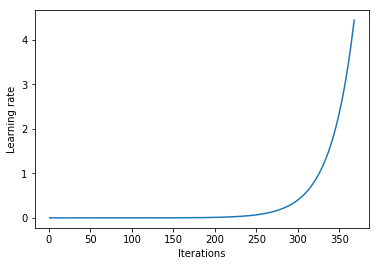

In [0]:
lr_finder.plot_lr()

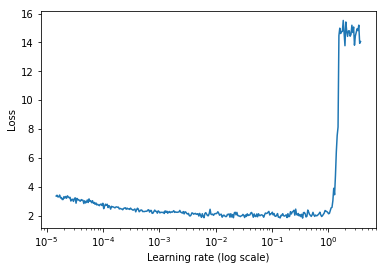

In [0]:
lr_finder.plot()

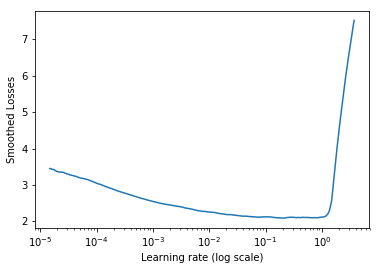

In [0]:
lr_finder.plot_smoothed_loss()

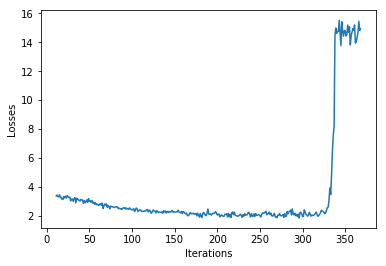

In [0]:
lr_finder.plot_loss()

## Method 2

In [0]:
from matplotlib import pyplot as plt
import math
from keras.callbacks import LambdaCallback
import keras.backend as K


class LRFinder:
    """
    Plots the change of the loss function of a Keras model when the learning rate is exponentially increasing.
    See for details:
    https://towardsdatascience.com/estimating-optimal-learning-rate-for-a-deep-neural-network-ce32f2556ce0
    """
    def __init__(self, model):
        self.model = model
        self.losses = []
        self.lrs = []
        self.best_loss = 1e9

    def on_batch_end(self, batch, logs):
        # Log the learning rate
        lr = K.get_value(self.model.optimizer.lr)
        self.lrs.append(lr)

        # Log the loss
        loss = logs['loss']
        self.losses.append(loss)

        # Check whether the loss got too large or NaN
        if math.isnan(loss) or loss > self.best_loss * 4:
            self.model.stop_training = True
            return

        if loss < self.best_loss:
            self.best_loss = loss

        # Increase the learning rate for the next batch
        lr *= self.lr_mult
        K.set_value(self.model.optimizer.lr, lr)

    def find(self, x_train, y_train, start_lr, end_lr, batch_size=64, epochs=1):
        num_batches = epochs * x_train.shape[0] / batch_size
        self.lr_mult = (float(end_lr) / float(start_lr)) ** (float(1) / float(num_batches))

        # Save weights into a file
        self.model.save_weights('tmp.h5')

        # Remember the original learning rate
        original_lr = K.get_value(self.model.optimizer.lr)

        # Set the initial learning rate
        K.set_value(self.model.optimizer.lr, start_lr)

        callback = LambdaCallback(on_batch_end=lambda batch, logs: self.on_batch_end(batch, logs))

        self.model.fit(x_train, y_train,
                        batch_size=batch_size, epochs=epochs,
                        callbacks=[callback])

        # Restore the weights to the state before model fitting
        self.model.load_weights('tmp.h5')

        # Restore the original learning rate
        K.set_value(self.model.optimizer.lr, original_lr)

    def find_generator(self, generator, start_lr, end_lr, epochs=1, steps_per_epoch=None, **kw_fit):
            if steps_per_epoch is None:
                try:
                    steps_per_epoch = len(generator)
                except (ValueError, NotImplementedError) as e:
                    raise e('`steps_per_epoch=None` is only valid for a'
                            ' generator based on the '
                            '`keras.utils.Sequence`'
                            ' class. Please specify `steps_per_epoch` '
                            'or use the `keras.utils.Sequence` class.')
            self.lr_mult = (float(end_lr) / float(start_lr)) ** (float(1) / float(steps_per_epoch))

            # Save weights into a file
            self.model.save_weights('tmp.h5')

            # Remember the original learning rate
            original_lr = K.get_value(self.model.optimizer.lr)

            # Set the initial learning rate
            K.set_value(self.model.optimizer.lr, start_lr)

            callback = LambdaCallback(on_batch_end=lambda batch,
                                      logs: self.on_batch_end(batch, logs))

            self.model.fit_generator(generator=generator,
                                     epochs=epochs,
                                     steps_per_epoch=steps_per_epoch,
                                     callbacks=[callback],
                                     **kw_fit)

            # Restore the weights to the state before model fitting
            self.model.load_weights('tmp.h5')

            # Restore the original learning rate
            K.set_value(self.model.optimizer.lr, original_lr)

    def plot_loss(self, n_skip_beginning=10, n_skip_end=5):
        """
        Plots the loss.
        Parameters:
            n_skip_beginning - number of batches to skip on the left.
            n_skip_end - number of batches to skip on the right.
        """
        plt.ylabel("loss")
        plt.xlabel("learning rate (log scale)")
        plt.plot(self.lrs[n_skip_beginning:-n_skip_end], self.losses[n_skip_beginning:-n_skip_end])
        plt.xscale('log')

    def plot_loss_change(self, sma=1, n_skip_beginning=10, n_skip_end=5, y_lim=(-0.01, 0.01)):
        """
        Plots rate of change of the loss function.
        Parameters:
            sma - number of batches for simple moving average to smooth out the curve.
            n_skip_beginning - number of batches to skip on the left.
            n_skip_end - number of batches to skip on the right.
            y_lim - limits for the y axis.
        """
        assert sma >= 1
        derivatives = [0] * sma
        for i in range(sma, len(self.lrs)):
            derivative = (self.losses[i] - self.losses[i - sma]) / sma
            derivatives.append(derivative)

        plt.ylabel("rate of loss change")
        plt.xlabel("learning rate (log scale)")
        plt.plot(self.lrs[n_skip_beginning:-n_skip_end], derivatives[n_skip_beginning:-n_skip_end])
        plt.xscale('log')
        plt.ylim(y_lim)
        
    def plot_loss_change1(sched, sma=1, n_skip=20, y_lim=(-0.01,0.01)):
        """
        Plots rate of change of the loss function.
        Parameters:
            sched - learning rate scheduler, an instance of LR_Finder class.
            sma - number of batches for simple moving average to smooth out the curve.
            n_skip - number of batches to skip on the left.
            y_lim - limits for the y axis.
        """
        derivatives = [0] * (sma + 1)
        for i in range(1 + sma, len(learn.sched.lrs)):
            derivative = (learn.sched.losses[i] - learn.sched.losses[i - sma]) / sma
            derivatives.append(derivative)

        plt.ylabel("d/loss")
        plt.xlabel("learning rate (log scale)")
        plt.plot(learn.sched.lrs[n_skip:], derivatives[n_skip:])
        plt.xscale('log')
        plt.ylim(y_lim)

In [0]:
model1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
# model is a Keras model
lr_finder = LRFinder(model1)

# Train a model with batch size 512 for 5 epochs
# with learning rate growing exponentially from 0.0001 to 1
lr_finder.find(X_train, Y_train, start_lr=1e-5, end_lr=10, batch_size=128, epochs=5)

Epoch 1/5
50000/50000 [==============================] - 28s 567us/step - loss: 2.4400 - acc: 0.1849
Epoch 2/5
50000/50000 [==============================] - 26s 522us/step - loss: 1.7510 - acc: 0.3703
Epoch 3/5
50000/50000 [==============================] - 26s 522us/step - loss: 1.3075 - acc: 0.5448
Epoch 4/5
50000/50000 [==============================] - 26s 522us/step - loss: 1.2111 - acc: 0.6019
Epoch 5/5
14720/50000 [=======>......................] - ETA: 18s - loss: 1.6056 - acc: 0.5620

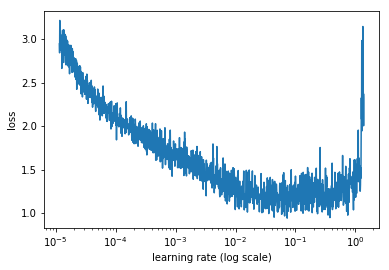

In [0]:
# Plot the loss, ignore 20 batches in the beginning and 5 in the end
lr_finder.plot_loss(n_skip_beginning=20, n_skip_end=5)

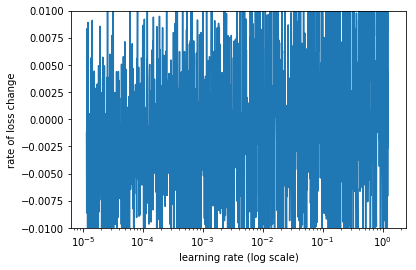

In [0]:
# Plot rate of change of the loss
# Ignore 20 batches in the beginning and 5 in the end
# Smooth the curve using simple moving average of 20 batches
# Limit the range for y axis to (-0.02, 0.01)
lr_finder.plot_loss_change(sma=20, n_skip_beginning=20, n_skip_end=5, y_lim=(-0.01, 0.01))

## From Method 1 and Method 2 results, decided to use lr=0.01

In [0]:
batch_size = 128
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

In [0]:
model1.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=0, steps_per_epoch=390, epochs=100)`


Model took 2600.22 seconds to train


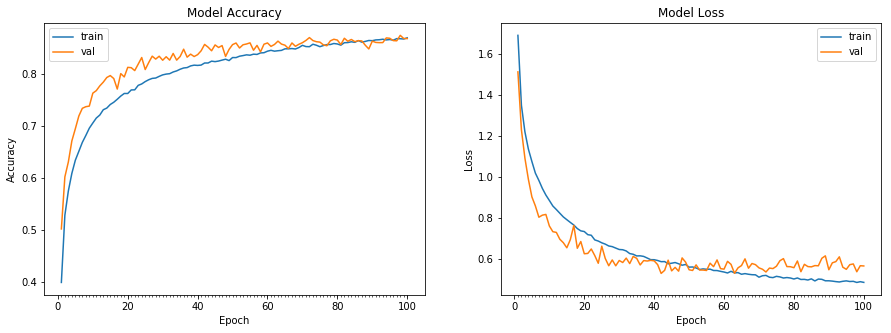

Accuracy on test data is: 86.72


In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
cutout = get_cutout_images()

final_weights_path = 'EVA_assgn_11_weights_0_100.h5'

callbacks_list = [
    ModelCheckpoint(final_weights_path, monitor='val_acc', verbose = 0,save_best_only = True)
   
]

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False, preprocessing_function= cutout)


# train the model
start = time.time()
# Train the model
model_info = model1.fit_generator(datagen.flow(X_train, Y_train, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (X_test, Y_test), callbacks = callbacks_list, verbose=0)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(X_test, Y_test, model1))

## Save Best weights on Google Drive

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

     |████████████████████████████████| 993kB 2.8MB/s 


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
model1.save_weights('EVA_assgn_11_weights_0_100.h5')
weights_file = drive.CreateFile({'title' : 'EVA_assgn_11_weights_0_100.h5'})
weights_file.SetContentFile('EVA_assgn_11_weights_0_100.h5')
weights_file.Upload()
drive.CreateFile({'id': weights_file.get('id')})

GoogleDriveFile({'id': '1exy1DNN6HEezfjoKzVteCpVfWEK0QieR'})

## 25 different misclassified images selection for Grad Cam check

In [0]:
class_dict = {0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',
               5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

In [0]:
Y_prediction = model1.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_prediction,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_test,axis = 1) 

In [0]:
incorrect_indices = np.where(Y_pred_classes != Y_true)[0]

In [0]:
len(incorrect_indices)

1328

In [0]:
incorrect_indices[:10]

array([ 25,  35,  36,  52,  57,  58,  61,  74,  78, 106])

In [0]:
Y_pred_classes[25], Y_true[25]

(5, 2)

In [0]:
import random
random.shuffle(incorrect_indices)

In [0]:
incorrect_indices[:10]

array([1445, 8378, 7104, 4982, 9132,  147, 1924, 2172, 5455, 1178])

In [0]:
misclassified_images = incorrect_indices[:25]

## Visualize 25 misclassified images

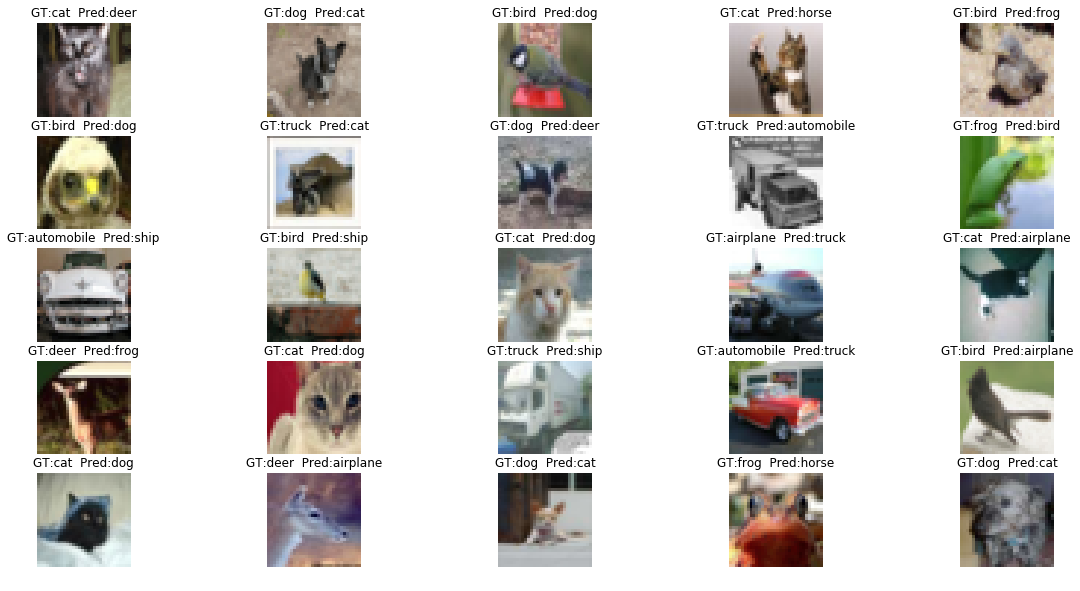

In [0]:
fig = plt.figure(figsize=(20, 10))

test_features1 = np.copy(test_features)
all_images = []
misclass_data = []
for ind_ in misclassified_images:
  all_images.append(test_features1[ind_])
  misclass_data.append((test_features1[ind_], Y_true[ind_], Y_pred_classes[ind_]))
  
cols, rows = 5, 5
img_num = cols * rows

for i in range(img_num):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(misclass_data[i][0], interpolation="nearest")
    plt.title('GT:' + str(class_dict[misclass_data[i][1]]) + '  Pred:' + str(class_dict[misclass_data[i][2]]))
    plt.axis('off')

## Layer selection to calculate grad check

In [0]:
model1.get_layer('conv2d_72')

In [0]:
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()## train features get scaled in grad check function

## Grad Cam implementation and visualization for misclassified images

In [0]:
def grad_cam(test_data, img_id, last_layer, num_channels):
    img = test_data[img_id]
    x = np.copy(img)
    x = np.expand_dims(x, axis=0)
    x = x.astype('float32')
    
    preds = model1.predict(x)
    class_idx = np.argmax(preds[0])
    class_output = model1.output[:, class_idx]
    last_conv_layer = model1.get_layer(last_layer)
    
    grads = K.gradients(class_output, last_conv_layer.output)[0]
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    iterate = K.function([model1.input], [pooled_grads, last_conv_layer.output[0]])
    
    pooled_grads_value, conv_layer_output_value = iterate([x])
    for i in range(num_channels):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    img1 = test_features[img_id]
    superimposed_img = cv2.addWeighted(img1, 0.6, heatmap, 0.4, 0)
    return {'original' : img1, 'grad_cam': superimposed_img, 'class_idx': class_idx, 'image_id': img_id}

In [0]:
def show_images(result):
  fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(6,2))

  ax1.imshow(result['original'])
  #ax1.set_title(class_dict[result['class_idx']])
  ax1.set_title('GT:' + str(class_dict[Y_true[result['image_id']]]) + '  Pred:' + str(class_dict[Y_pred_classes[result['image_id']]]))
  ax2.imshow(result['grad_cam'])
  ax2.set_title('    GradCAM')

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memo

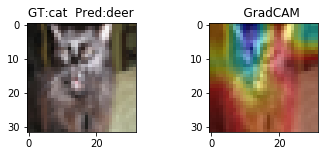

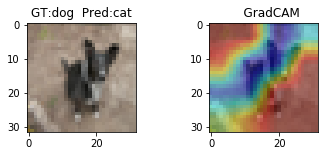

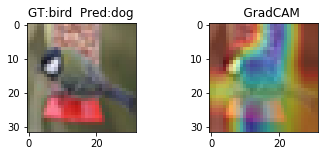

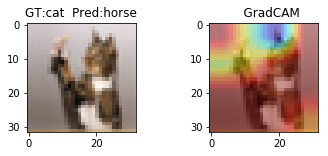

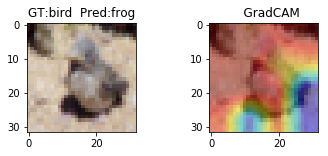

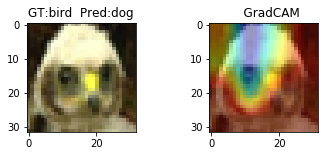

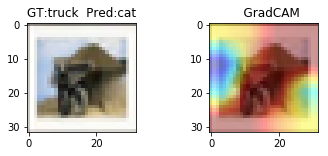

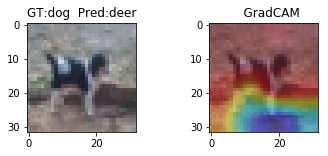

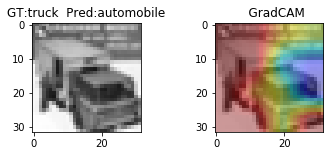

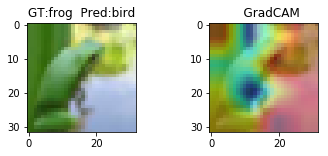

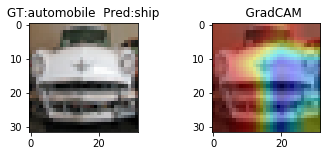

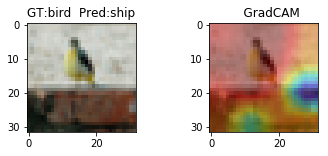

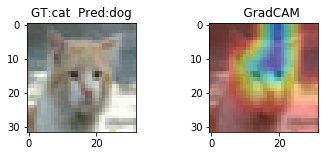

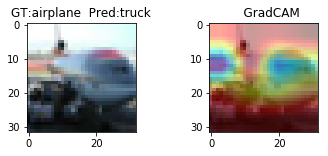

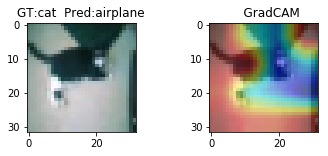

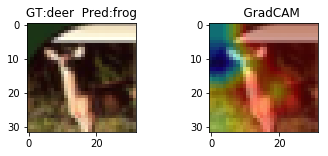

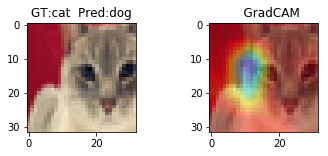

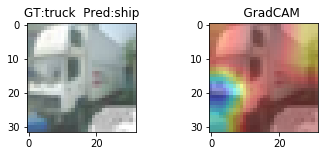

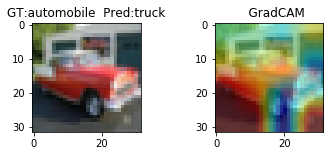

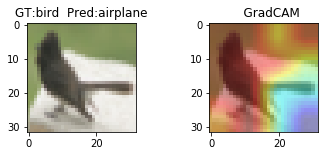

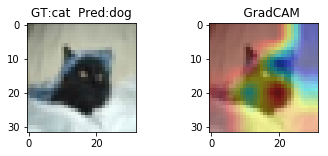

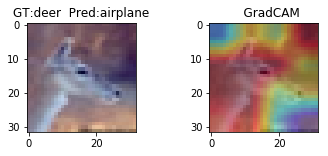

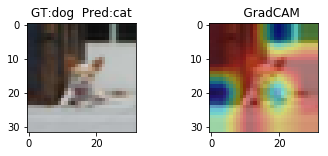

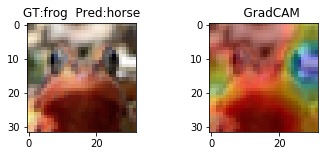

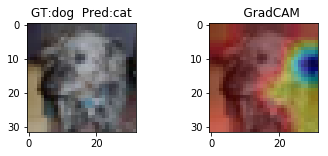

In [0]:
for img_id in misclassified_images:
  result = grad_cam(X_test, img_id, 'conv2d_72', 10)
  show_images(result)